2024-10-02 12:07:12.799156: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 12:07:12.810016: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 12:07:12.842689: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 12:07:12.876454: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 12:07:12.884651: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 12:07:12.914610: I tensorflow/core/platform/cpu_feature_gu

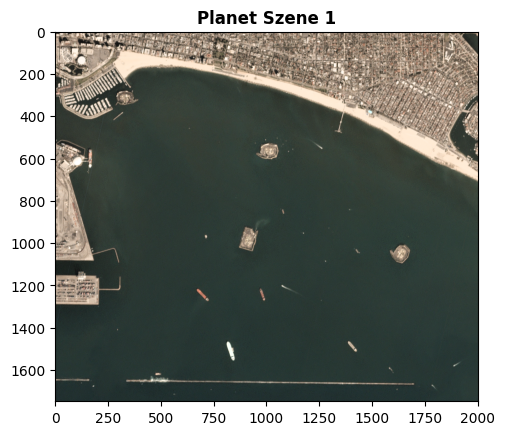

Anzahl der Schiff-Bilder:1000 

Anzahl der Kein-Schiff-Bilder:3000


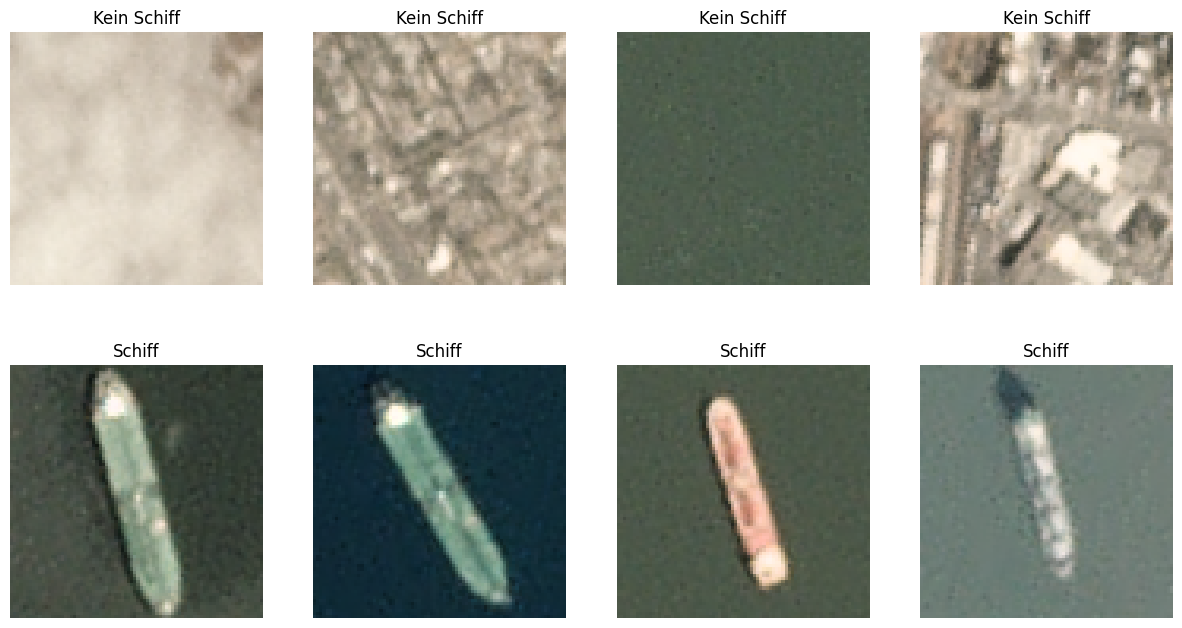

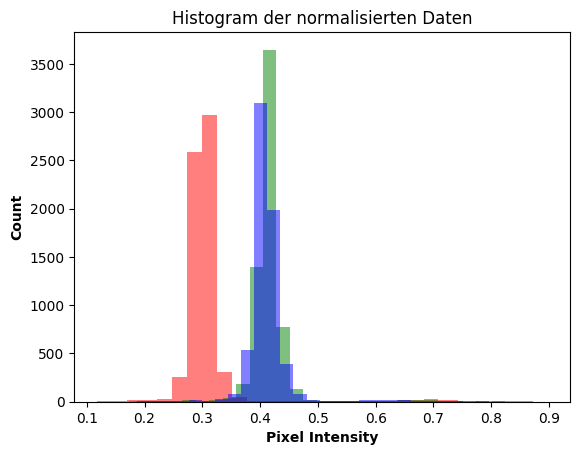

x_train shape (2400, 80, 80, 3)
x_test shape (800, 80, 80, 3)
y_train shape (2400, 2)
y_test shape (800, 2)
y_train shape (800, 80, 80, 3)
y_test shape (800, 2)


/opt/conda/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.6488 - loss: 1.0067 - val_accuracy: 0.8400 - val_loss: 0.3523
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.8452 - loss: 0.4220 - val_accuracy: 0.8637 - val_loss: 0.3127
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.8675 - loss: 0.3368 - val_accuracy: 0.8900 - val_loss: 0.2827
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.8835 - loss: 0.2868 - val_accuracy: 0.8913 - val_loss: 0.2685
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.8926 - loss: 0.2894 - val_accuracy: 0.8850 - val_loss: 0.2832
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.8723 - loss: 0.3338 - val_accuracy: 0.8150 - val_loss: 0.4481
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.8705 - loss: 0.3135 - val_accuracy: 0.8500 - val_loss: 0.4052
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8760 - loss: 0.3393 - val_accuracy: 0.9038 - v

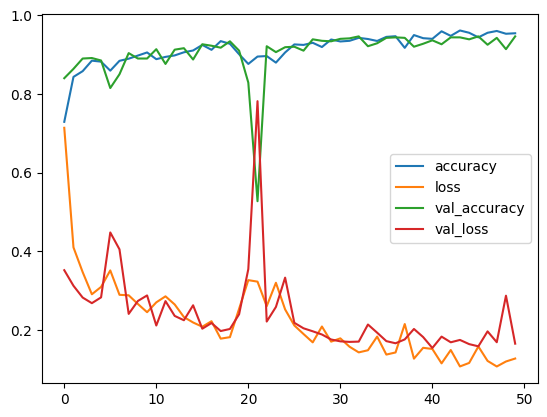

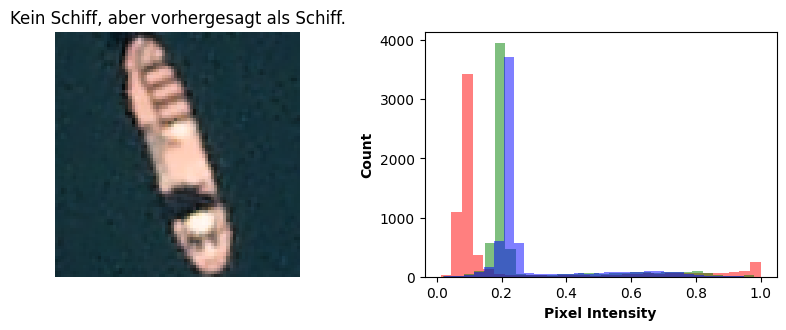

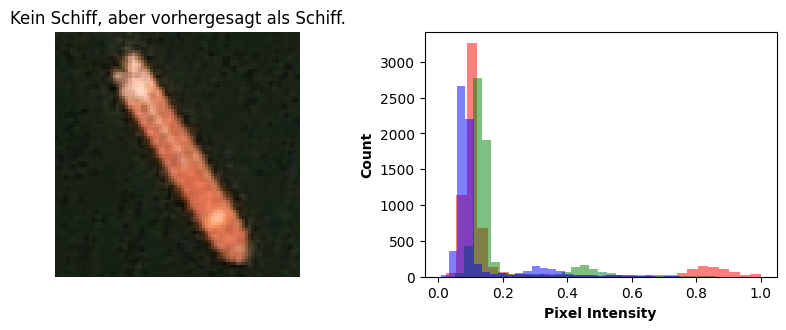

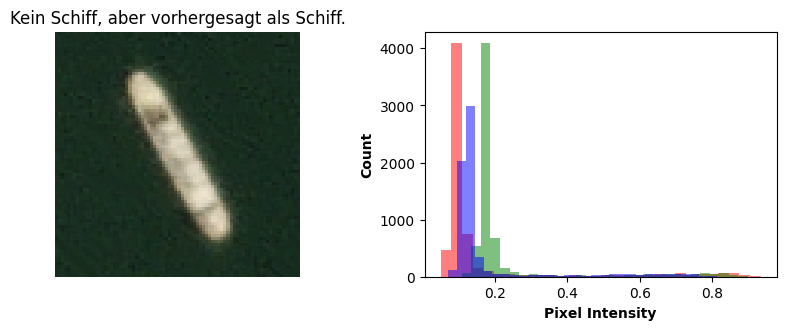

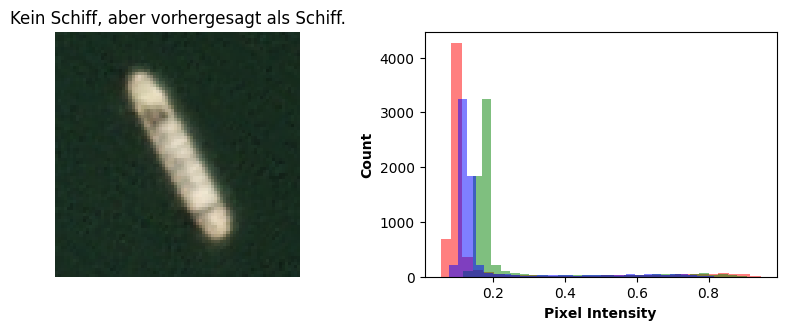

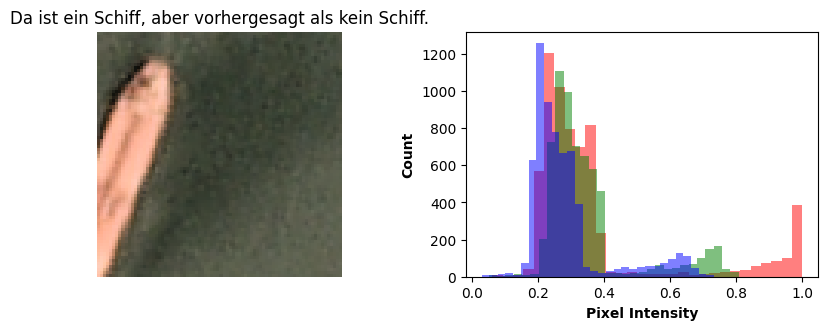

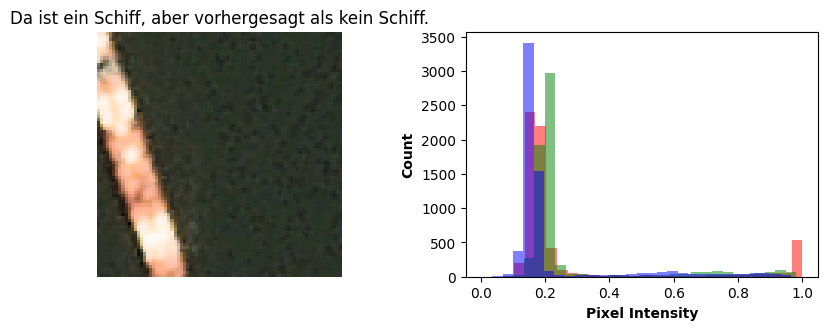

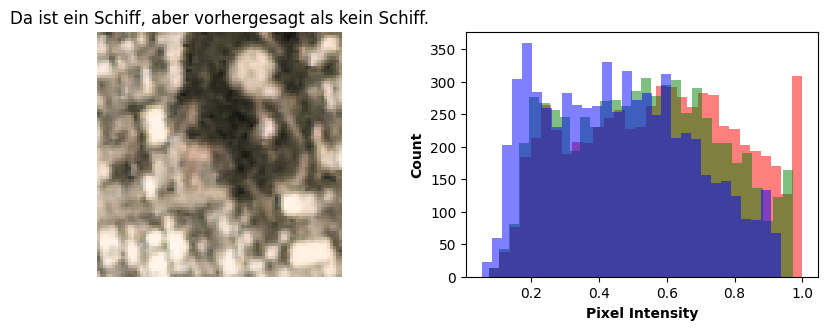

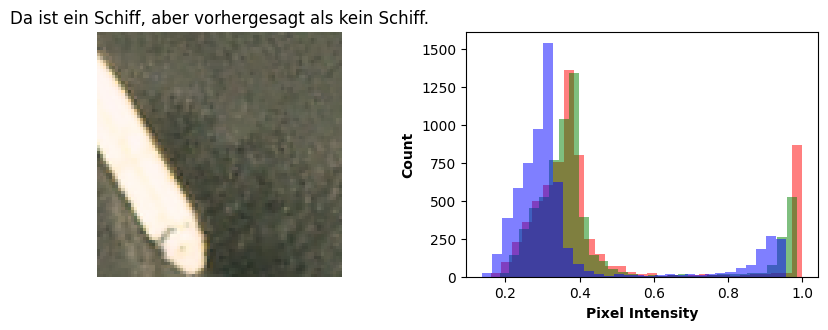

In [1]:
#  Schiff Klassifikation mit Satelliten Daten von Kaggle
#
# Programmstruktur:
# 1. Laden der Daten
#                 
# 2. Organisation der Daten 
#                
# 3. Modellierung
#                 
#                 Preparing of Test and Train Data</li>
#                 Implementation of Artificial Neural Network (ANN)</li>
#                 Implementation of Convolutional Neural Network (CNN)</li>  
#                 < 
# 
#  Daten Informationen
# 
# Planet Daten in San Francisco Bay von Kaggle: https://www.kaggle.com/datasets/rhammell/ships-in-satellite-imagery
#    
# Der Datensatz liegt auch als JSON-formatierte Textdatei shipsnet.json vor. Das geladene Objekt enthält Daten, Beschriftungen, Szenen-IDs und Standortlisten.

# Werte sind 1 oder 0, und representieren die "Schiff/Ship" Klassr der "Kein Schiff/no-ship".
# **scene id**: Die eindeutige Kennung der PlanetScope-Szene, aus der der Bildchip extrahiert wurde. Die Szenen-ID kann mit der Planet-API verwendet werden, um die gesamte Szene zu suchen und herunterzuladen.
# **longitude_latitude**: Die Längen- und Breitengradkoordinaten des Bildmittelpunkts, wobei die Werte durch einen einzelnen Unterstrich getrennt sind.

# Die Klasse „Schiff“ umfasst 1000 Bilder. Die Bilder dieser Klasse sind  zentriert auf dem Rumpf eines einzelnen Schiffes. Schiffe unterschiedlicher Größe, Ausrichtung und atmosphärischer Aufnahmebedingungen sind enthalten. Beispielbilder aus dieser Klasse werden unten im Skript angezeigt.

# Die Klasse „kein Schiff“ umfasst 3000 Bilder. Ein Drittel davon ist eine zufällige Auswahl verschiedener Landbedeckungsmerkmale – Wasser, Vegetation, nackte Erde, Gebäude usw. –, die keinen Teil eines Schiffs enthalten. Das nächste Drittel sind „Teilschiffe“, die nur einen Teil eines Schiffs enthalten, aber nicht genug, um die vollständige Definition der Klasse „Schiff“ zu erfüllen. Das letzte Drittel sind Bilder, die zuvor von maschinellen Lernmodellen falsch beschriftet wurden, was normalerweise an hellen Pixeln oder starken linearen Merkmalen lag. Beispielbilder aus dieser Klasse werden unten im Skript angezeigt.

# Zur Installation der Bibliotheken etc siehe auch:
# https://www.activestate.com/resources/quick-reads/how-to-install-keras-and-tensorflow/
#

#!pip install numpy pandas rasterio tensorflow matplotlib scikit-learn scikeras

import numpy as np
from numpy import expand_dims
import pandas as pd
import json
import matplotlib.pyplot as plt
import rasterio
from rasterio import plot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import tensorflow

from tensorflow.keras.utils import to_categorical

from tensorflow.keras import layers
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

#1. Laden der Daten
# Hier ist ein Besipiel einer Planet Szene..
#scene="kaggle/input/ships-in-satellite-imagery/scenes/scenes/lb_1.png"
scene="lb_1.png"
with rasterio.open(scene) as src:
  data=src.read()
  plot.show(data, title = "Planet Szene 1")

#with open('kaggle/input/ships-in-satellite-imagery/shipsnet.json') as data_file:
with open('../shipsnet.json') as data_file:
    dataset = json.load(data_file)
shipsnet= pd.DataFrame(dataset)
shipsnet.head()


#  Wir benötigen nur zwei Spalten: data und labels. 

shipsnet = shipsnet[["data", "labels"]]
shipsnet.head()

len(shipsnet["data"].iloc[0])


# Die Datenwerte von jedem 80x80 RGB Bild sind in einer Liste von 19200 Integer Werten abgelegt. Die ersten 6400 Einträge sind der rote Kanal, die nächten 6400 grün, und 6400 blau.
#

ship_images = shipsnet["labels"].value_counts()[1]
no_ship_images = shipsnet["labels"].value_counts()[0]
print("Anzahl der Schiff-Bilder:{}".format(ship_images),"\n")
print("Anzahl der Kein-Schiff-Bilder:{}".format(no_ship_images))


# 2. Organisation der Daten
# Arrays mit x als y Variablen
x = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')

x.shape

# Die aktuellen Daten für jedes Bild sind eine Reihe von abgeflachten 19.200 Datenpunkten, die die RGB-Werte jedes Pixels darstellen. Wir müssen sie also umformen. Nach der Umformung besteht jedes Element in der neuen x-Variable aus 3 Listen. Jede dieser Listen enthält RGB-Werte für jedes Pixel für die Länge und Breite des Bilds.

x_reshaped = x.reshape([-1, 3, 80, 80])
x_reshaped.shape


# Änderung der Dimensionen
x_reshaped = x.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])
x_reshaped.shape
y.shape

#  Die y Variable enthält die Label 1 oder 0. 
y_reshaped = to_categorical(y, num_classes=2)
y_reshaped.shape
y_reshaped

# Wir sehen uns die Bilder an. 
image_no_ship = x_reshaped[y==0]
image_ship = x_reshaped[y==1]

def plot(a,b):
    
    plt.figure(figsize=(15, 15))
    for i, k in enumerate(range(1,9)):
        if i < 4:
            plt.subplot(2,4,k)
            plt.title('Kein Schiff')
            plt.imshow(image_no_ship[i+2])
            plt.axis("off")
        else:
            plt.subplot(2,4,k)
            plt.title('Schiff')
            plt.imshow(image_ship[i+15])
            plt.axis("off")
            
    plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.25)
    plt.show()

# Anwendung der Funktion 
plot(image_no_ship, image_ship)


# 3. Modelling 
# Normalisierung der X-Daten 

x_reshaped = x_reshaped / 255
#x_reshaped[0][0][0] # Normalisierte RGB Werte des ersten Pixel des ersten Bildes

n_bins = 30
plt.hist(x_reshaped[y == 0][0][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
plt.hist(x_reshaped[y == 0][0][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
plt.hist(x_reshaped[y == 0][0][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
plt.ylabel('Count', fontweight = "bold")
plt.xlabel('Pixel Intensity', fontweight = "bold")
plt.title("Histogram der normalisierten Daten")
plt.show()

# Aufteilung der Daten in Training- und Test-Daten.
x_train_1, x_test, y_train_1, y_test = train_test_split(x_reshaped, y_reshaped,
                                                        test_size = 0.20, random_state = 42)

x_train, x_val, y_train, y_val = train_test_split(x_train_1, y_train_1, 
                                                  test_size = 0.25, random_state = 42)

print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)
print("y_train shape",x_val.shape)
print("y_test shape",y_val.shape)

x_train.shape

# Implementierung des Artificial Neural Network (ANN)
from keras import callbacks
model = Sequential()
model.add(Flatten(input_shape=[80, 80, 3]))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)

history = model.fit(x_train, y_train, epochs = 50, validation_data=(x_val, y_val), callbacks = [earlystopping])

model.evaluate(x_test, y_test)
print("Modell training fertig..")
pd.DataFrame(history.history).plot();

#Jetzt können wir unsere test Daten nutzen. Schauen wir uns Bilder an..

prediction = model.predict(x_test)
pd.Series(prediction[0], index=["Kein Schiff", "Schiff"])

plt.show()

#Bilder die mit Schiff vorhergesagt wurden, wo aber keines ist... 

predicted_data = pd.DataFrame(prediction, columns=["Kein Schiff", "Schiff"])
predicted_data.head(3)

y_test_data = pd.DataFrame(y_test, columns=["Kein Schiff", "Schiff"])
y_test_data.head(3)

predicted_data['Schiff'] = y_test[:, 1]
predicted_data.head()

predicted_data["Difference"] = predicted_data["Schiff"] - predicted_data["Kein Schiff"]
predicted_data

# Wenn der Unterschied (Difference) hoch ist, bedeutet dies, dass das Bild als Schiff vorhergesagt wurde, obwohl es kein Schiff ist. Um solche vorhergesagten Bilder zu sehen, müssen wir die Differenzspalte vom größten zum kleinsten sortieren.

predicted_data.sort_values('Difference', ascending=False).head(10)

# Schauen wir uns ein Paar Bilder und die Histogramme an.

indexes = predicted_data.sort_values('Difference', ascending = False).head(4).index.to_list()

def plotHistogram(image_index):

    plt.figure(figsize = (10,7))
    plt.subplot(2,2,1)
    plt.imshow(x_test[image_index])
    plt.axis('off')
    plt.title('Kein Schiff, aber vorhergesagt als Schiff.')
    histo = plt.subplot(2,2,2)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(x_test[image_index][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()

#Implementation der Funktion

for i in indexes:
    plotHistogram(i)
# Schauen wir uns nun die Bilder an, bei denen mutmaßlich kein Schiff zu sehen ist, obwohl ein Schiff vorhanden ist.

predicted_data.sort_values('Difference', ascending=True).head(10)

indexes = predicted_data.sort_values('Difference', ascending = True).head(4).index.to_list()

def plotHistogram(image_index):

    plt.figure(figsize = (10,7))
    plt.subplot(2,2,1)
    plt.imshow(x_test[image_index])
    plt.axis('off')
    plt.title('Da ist ein Schiff, aber vorhergesagt als kein Schiff.')
    histo = plt.subplot(2,2,2)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(x_test[image_index][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()

#Implementation der Funktion

for i in indexes:
    plotHistogram(i)

#end of ANN code

# Im Teil 2 gibt es die Implementation mit einem Convolutional Neurol Network.
